# DarkNet traffic detection

Traffic Classification

### CIC-Darknet2020

Darknet is the unused address space of the internet which is not speculated to interact with other computers in the world. Any communication from the dark space is considered sceptical owing to its passive listening nature which accepts incoming packets, but outgoing packets are not supported. Due to the absence of legitimate hosts in the darknet, any traffic is contemplated to be unsought and is characteristically treated as probe, backscatter, or misconfiguration. Darknets are also known as network telescopes, sinkholes, or blackholes.

Darknet traffic classification is significantly important to categorize real-time applications. Analyzing darknet traffic helps in early monitoring of malware before onslaught and detection of malicious activities after outbreak.


### Data
In CICDarknet2020 dataset, a two-layered approach is used to generate benign and darknet traffic at the first layer. The darknet traffic constitutes Audio-Stream, Browsing, Chat, Email, P2P, Transfer, Video-Stream and VOIP which is generated at the second layer. To generate the representative dataset, we amalgamated our previously generated datasets, namely, ISCXTor2016 and ISCXVPN2016, and combined the respective VPN and Tor traffic in corresponding Darknet categories. 

Problem Statement
Discussing the problem setting and the first implcations of the given data set... 
* What assumptions can we make about the data?
* What problems are we expecting?

First Data Analysis, Cleaning and Feature Extraction
* Import the data to a Pandas DataFrame
* Run first simple statistics and visualizations
* Is there a need to clean the data? If yes, do so...
* Can we use the raw data directly, or should we extract features? What features are suitable ? 


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
INPUT_DATASET=r"Darknet.csv"

In [3]:
data=pd.read_csv(INPUT_DATASET)

In [4]:
data.head()
data.shape


(141530, 85)

In [5]:
#Depict all values from all the columns

def display_all(data):
    with pd.option_context("display.max_rows", 800, "display.max_columns", 800): 
        display(data)
display_all(data.head().T)

,0,1,2,3,4
Flow ID,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11-173.194.65.127-34697-19305-6
Src IP,10.152.152.11,10.152.152.11,10.152.152.11,10.152.152.11,10.152.152.11
Src Port,57158,57159,57160,49134,34697
Dst IP,216.58.220.99,216.58.220.99,216.58.220.99,74.125.136.120,173.194.65.127
Dst Port,443,443,443,443,19305
Protocol,6,6,6,6,6
Timestamp,24/07/2015 04:09:48 PM,24/07/2015 04:09:48 PM,24/07/2015 04:09:48 PM,24/07/2015 04:09:48 PM,24/07/2015 04:09:45 PM
Flow Duration,229,407,431,359,10778451
Total Fwd Packet,1,1,1,1,591
Total Bwd packets,1,1,1,1,400


In [6]:
data.columns
data.isnull().sum()
Label = pd.DataFrame(data['Label'])
Label_1=pd.DataFrame(data['Label.1'])
Label['Label'].nunique()
Label_1['Label.1'].value_counts()
data['Protocol'].nunique()
display_all(data.dtypes.T)

Flow ID                        object
Src IP                         object
Src Port                        int64
Dst IP                         object
Dst Port                        int64
Protocol                        int64
Timestamp                      object
Flow Duration                   int64
Total Fwd Packet                int64
Total Bwd packets               int64
Total Length of Fwd Packet      int64
Total Length of Bwd Packet      int64
Fwd Packet Length Max           int64
Fwd Packet Length Min           int64
Fwd Packet Length Mean        float64
Fwd Packet Length Std         float64
Bwd Packet Length Max           int64
Bwd Packet Length Min           int64
Bwd Packet Length Mean        float64
Bwd Packet Length Std         float64
Flow Bytes/s                  float64
Flow Packets/s                float64
Flow IAT Mean                 float64
Flow IAT Std                  float64
Flow IAT Max                    int64
Flow IAT Min                    int64
Fwd IAT Tota

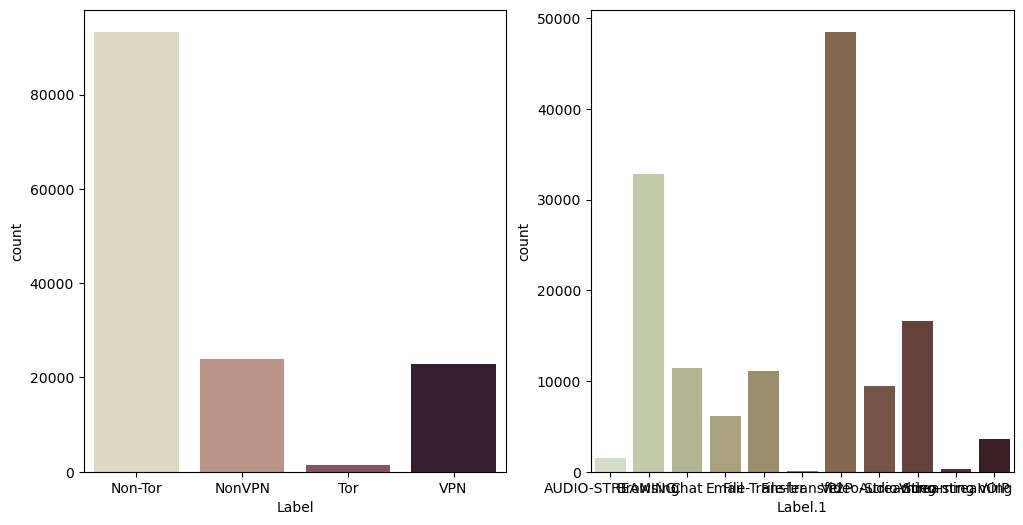

In [7]:
#Display the representation of the class variables - Label and Label.
#Looks like the classification for class variables is unstable
#Since there are 11 categories in the Label.1 variable, we will treat as being one of the Label.1 variable specific attributes.
figure, ax = plt.subplots(1,2,figsize =(12,6))

Label['Label'].value_counts()
sns.countplot(x="Label", palette="ch:.35", ax=ax[0], data=data)
sns.countplot(x="Label.1", palette="ch:.65",ax=ax[1], data=data)
plt.show()

In [8]:
#Encoding of variables that are categorical

from sklearn.preprocessing import LabelEncoder
import numpy as np
encoder = LabelEncoder()

# From the results, extract categorical attributes

d_1 = data.select_dtypes(include=['object']).copy()

d_2 = d_1.apply(encoder.fit_transform)

d_3= data.drop (['Flow ID', 'Src IP', 'Dst IP', 'Timestamp', 'Label', 'Label.1'], axis=1)

data_encoded=pd.concat([d_3, d_2], axis=1)

data_encoded['Label.1'].nunique()
data_encoded['Label'].unique()

array([0, 1, 2, 3])

In [9]:
d = dict.fromkeys(data_encoded.select_dtypes(np.int32).columns, np.int64)
data_encoded = data_encoded.astype(d)

In [10]:
display_all(data_encoded.dtypes.T)

Src Port                        int64
Dst Port                        int64
Protocol                        int64
Flow Duration                   int64
Total Fwd Packet                int64
Total Bwd packets               int64
Total Length of Fwd Packet      int64
Total Length of Bwd Packet      int64
Fwd Packet Length Max           int64
Fwd Packet Length Min           int64
Fwd Packet Length Mean        float64
Fwd Packet Length Std         float64
Bwd Packet Length Max           int64
Bwd Packet Length Min           int64
Bwd Packet Length Mean        float64
Bwd Packet Length Std         float64
Flow Bytes/s                  float64
Flow Packets/s                float64
Flow IAT Mean                 float64
Flow IAT Std                  float64
Flow IAT Max                    int64
Flow IAT Min                    int64
Fwd IAT Total                   int64
Fwd IAT Mean                  float64
Fwd IAT Std                   float64
Fwd IAT Max                     int64
Fwd IAT Min 

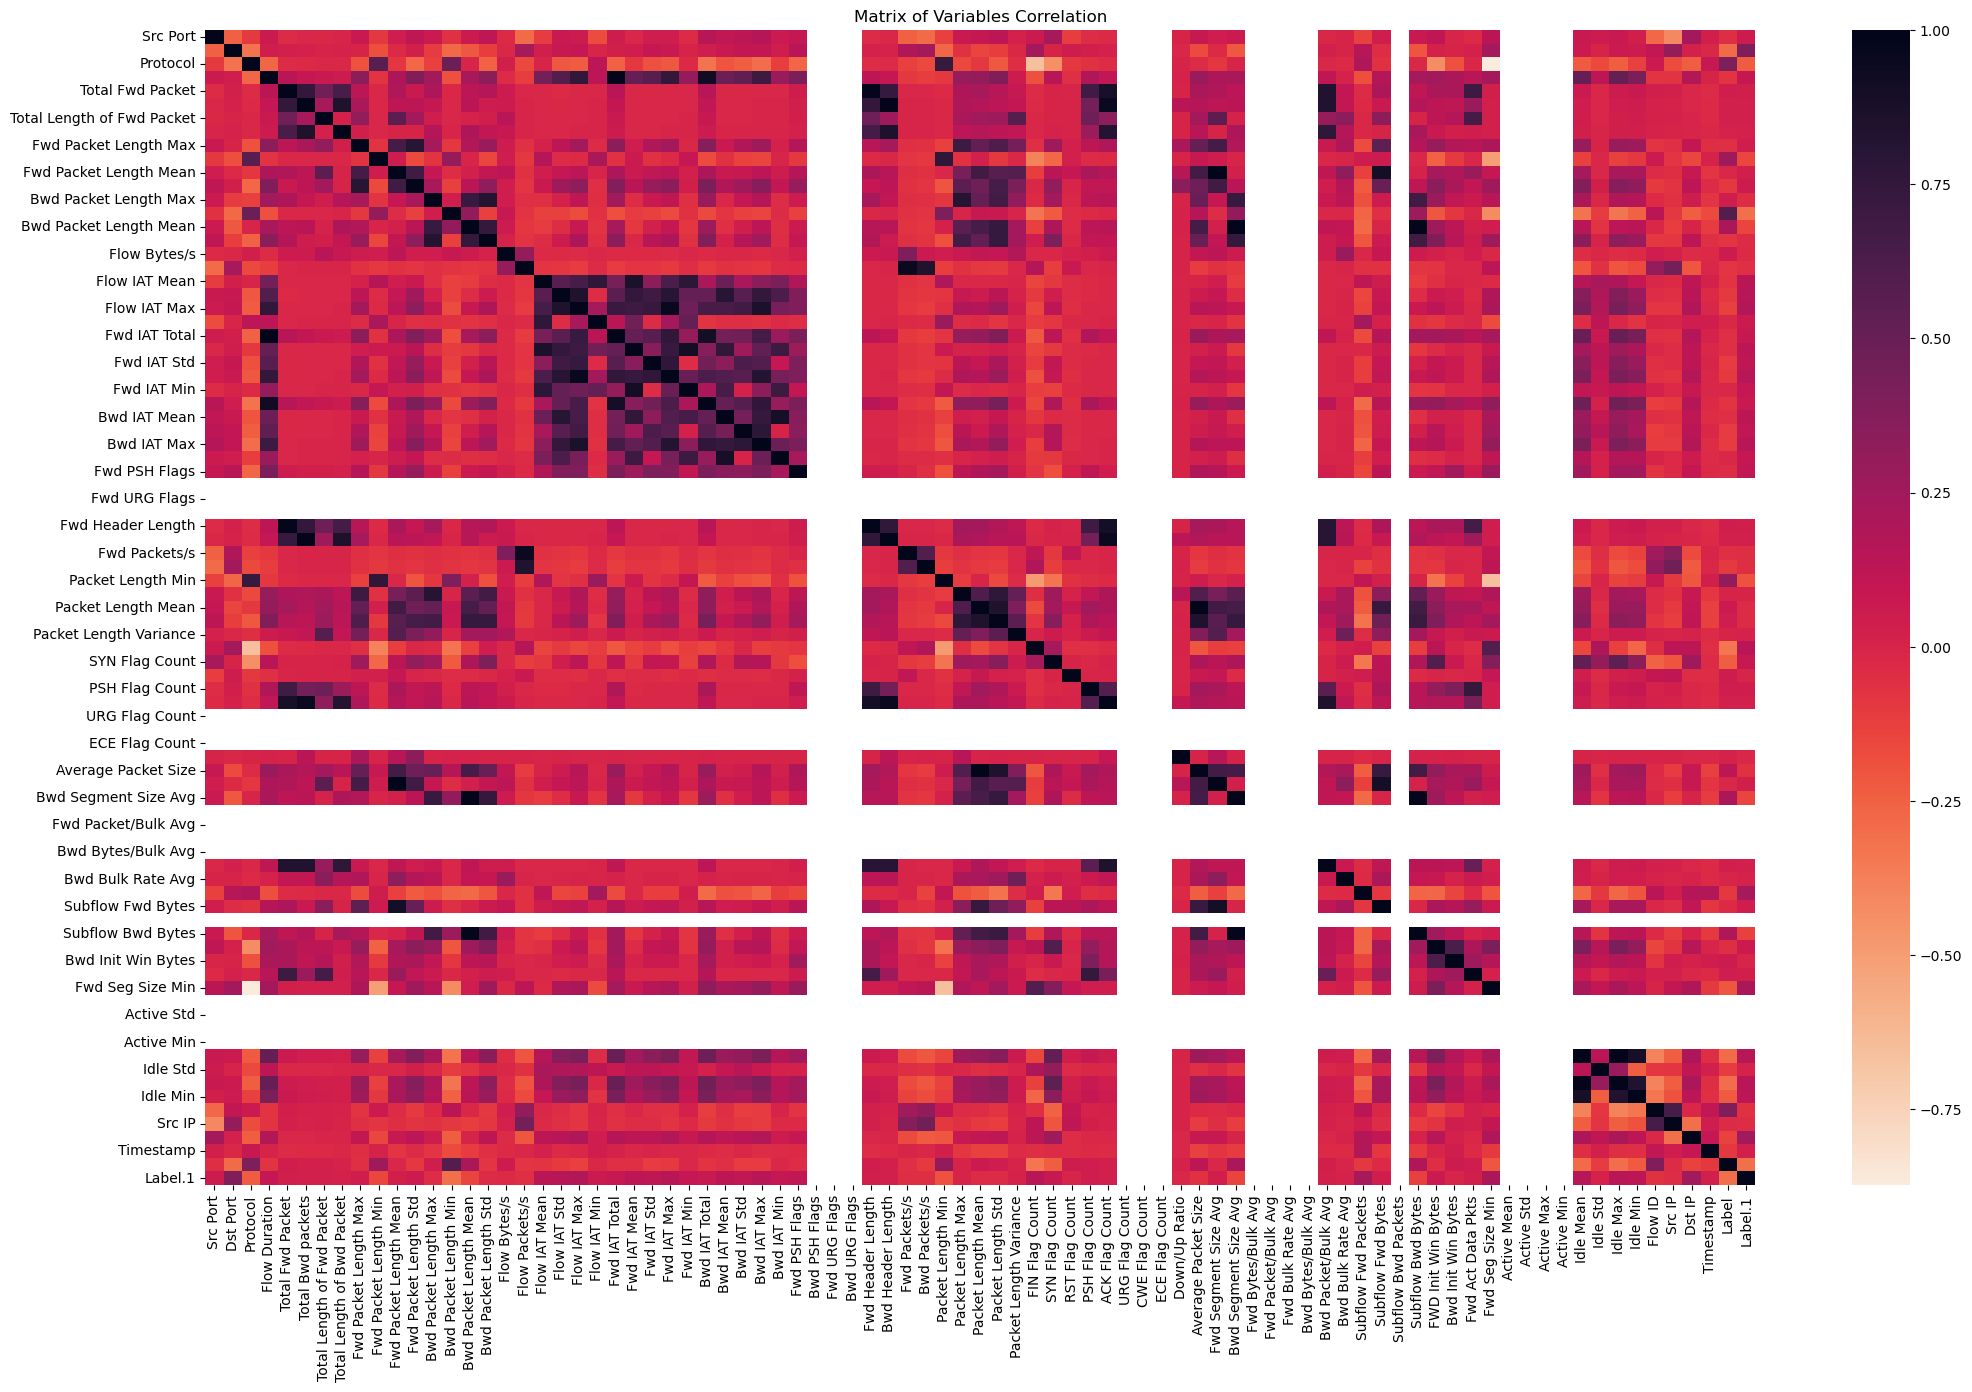

In [11]:
#Correlation between variables

figure, ax = plt.subplots(figsize=(25,15))

d_corr=data_encoded.corr()
sns.heatmap(d_corr, cmap='rocket_r', ax=ax)
ax.set_title("Matrix of Variables Correlation", fontsize =12)
plt.show()


In [12]:

# Dropping all variables on the map that have null values
#Variables'Flow Bytes/s 'and' Flow Packets/s have nan values - these variables are dropped' 

db_new=data_encoded.drop(['Fwd URG Flags', 'URG Flag Count', 'ECE Flag Count', 'Fwd Packet/Bulk Avg', 'Bwd Bytes/Bulk Avg','Subflow Bwd Packets','Active Mean', 'Active Std', 'Active Min', 'Active Max', 'Bwd PSH Flags', 'Bwd URG Flags', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Fwd Bytes/Bulk Avg', 'Fwd Bulk Rate Avg', 'Subflow Bwd Packets', 'Flow Bytes/s', 'Flow Packets/s'], axis=1) 

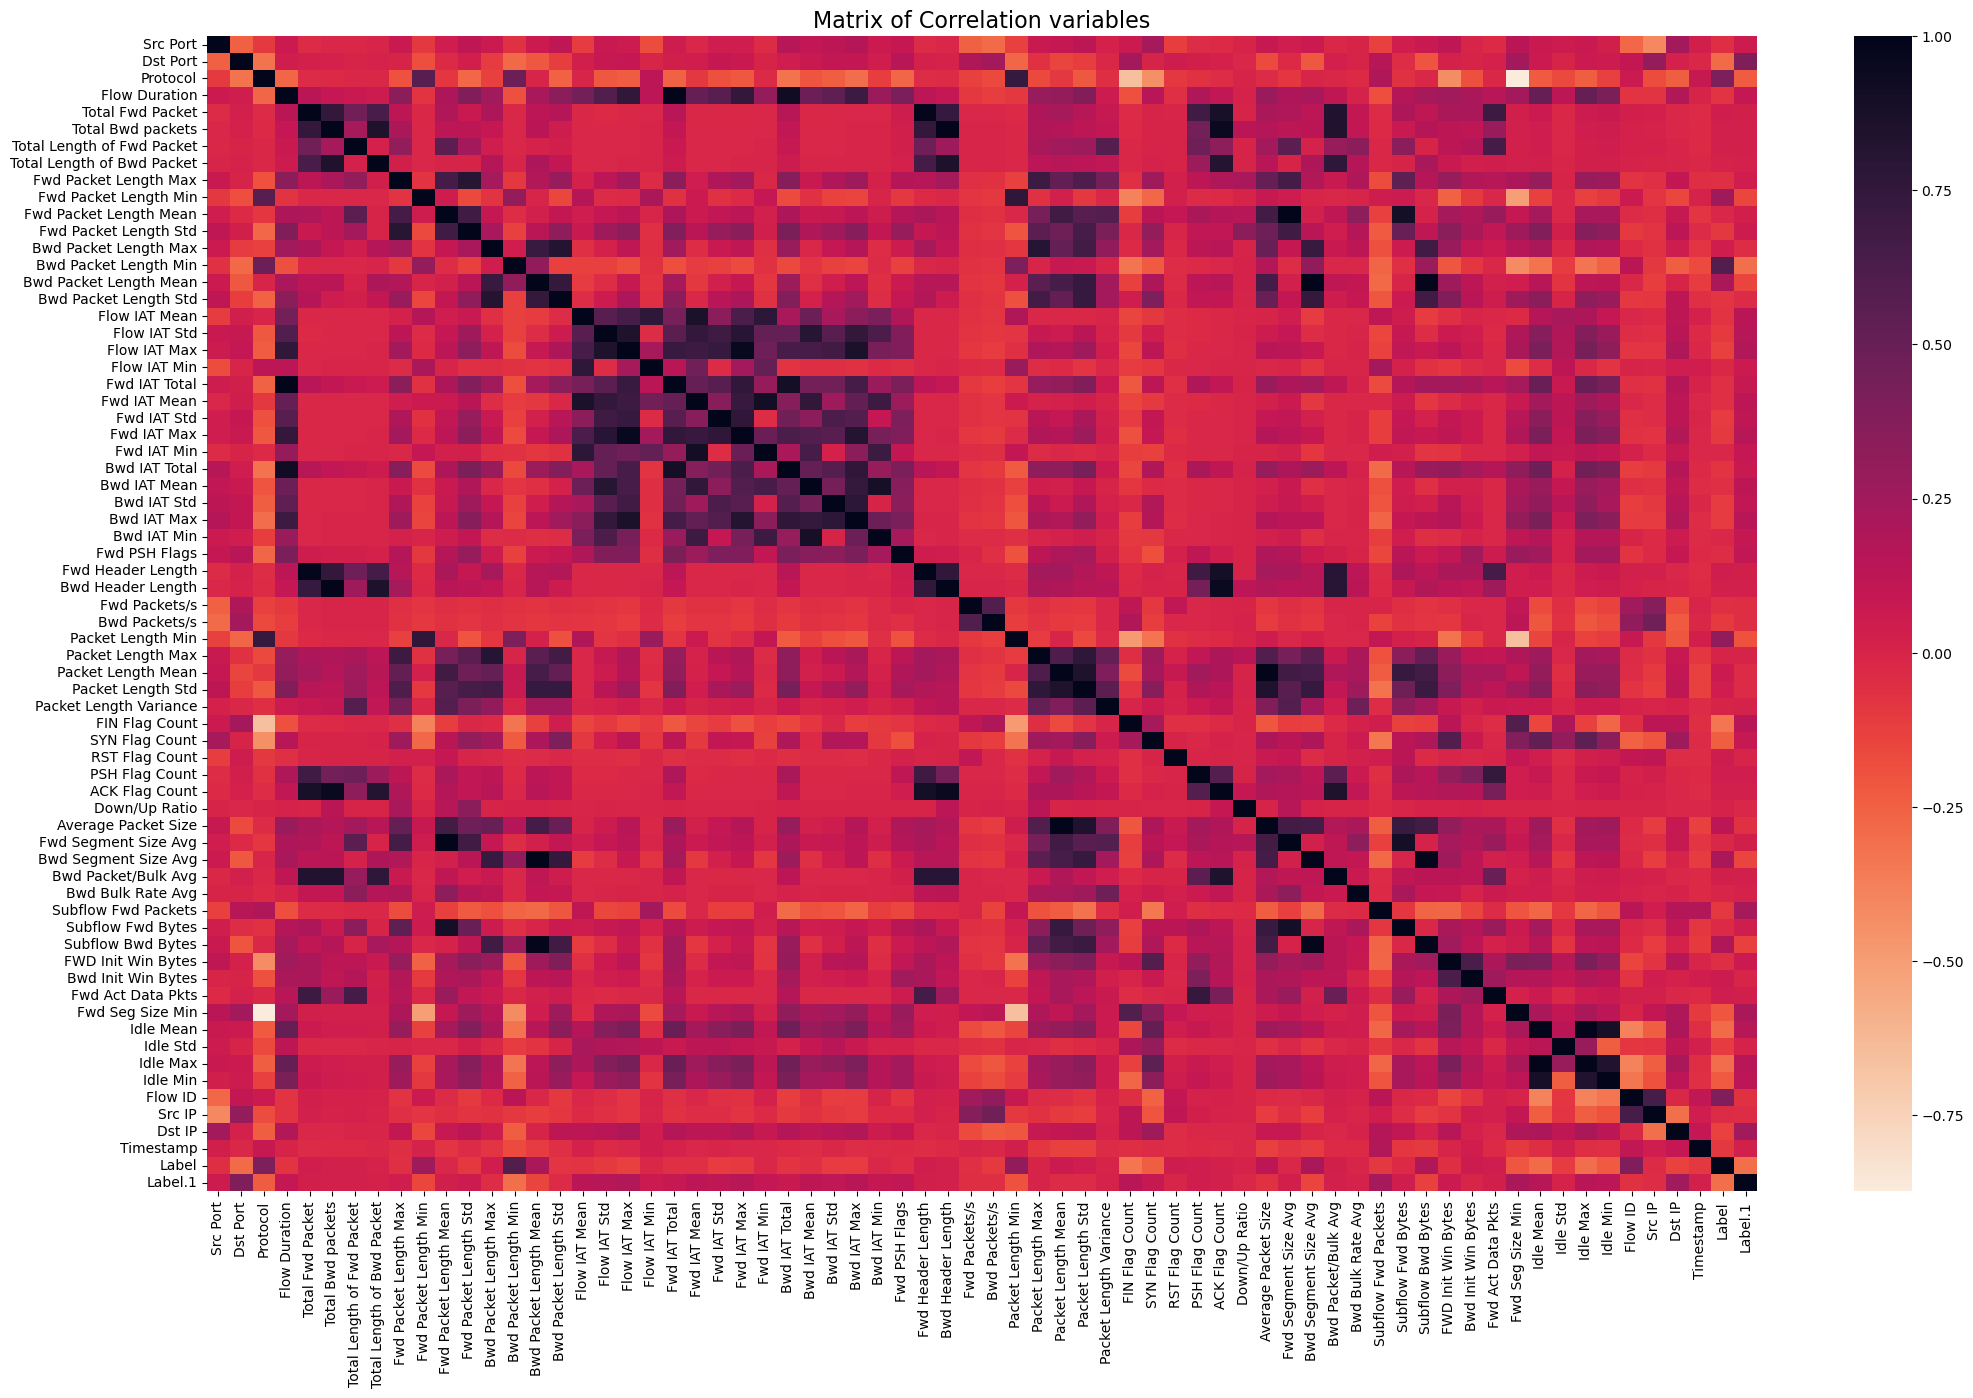

In [13]:
db_new

#Heatmap for the latest collection of data

figure, ax = plt.subplots(figsize=(25,15))

d_corr_1=db_new.corr()
sns.heatmap(d_corr_1, cmap='rocket_r', ax=ax)
ax.set_title("Matrix of Correlation variables", fontsize =16)
plt.show()



In [14]:
#Considering only those characteristics that correlate positively or negatively with the model

d_new_1 = db_new[['Protocol','Fwd Packet Length Min', 'Bwd Packet Length Min', 'Packet Length Min', 'Flow ID','Src Port', 'Dst Port', 'Flow Duration', 'Fwd Packet Length Std', 'FIN Flag Count', 'SYN Flag Count', 'Fwd Seg Size Min', 'Idle Mean', 'Idle Max', 'Timestamp', 'Label.1', 'Label']]

d_new_1.columns

Index(['Protocol', 'Fwd Packet Length Min', 'Bwd Packet Length Min',
       'Packet Length Min', 'Flow ID', 'Src Port', 'Dst Port', 'Flow Duration',
       'Fwd Packet Length Std', 'FIN Flag Count', 'SYN Flag Count',
       'Fwd Seg Size Min', 'Idle Mean', 'Idle Max', 'Timestamp', 'Label.1',
       'Label'],
      dtype='object')

In [15]:
train_x=d_new_1.drop(['Label'], axis=1)
train_y=pd.DataFrame(d_new_1['Label'])
train_y

,Label
0,0
1,0
2,0
3,0
4,0
...,...
141525,3
141526,3
141527,3
141528,3


In [16]:
train_x

,Protocol,Fwd Packet Length Min,Bwd Packet Length Min,Packet Length Min,Flow ID,Src Port,Dst Port,Flow Duration,Fwd Packet Length Std,FIN Flag Count,SYN Flag Count,Fwd Seg Size Min,Idle Mean,Idle Max,Timestamp,Label.1
0,6,0,0,0,22115,57158,443,229,0.000000,2,0,20,0.000000e+00,0.000000e+00,20151,0
1,6,0,0,0,22116,57159,443,407,0.000000,2,0,20,0.000000e+00,0.000000e+00,20151,0
2,6,0,0,0,22117,57160,443,431,0.000000,2,0,20,0.000000e+00,0.000000e+00,20151,0
3,6,0,0,0,29861,49134,443,359,0.000000,2,0,20,0.000000e+00,0.000000e+00,20151,0
4,6,0,0,0,15445,34697,19305,10778451,22.283313,1,0,20,1.437760e+15,1.437760e+15,20149,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141525,17,22,0,22,52825,55219,5355,411806,0.000000,0,0,8,0.000000e+00,0.000000e+00,7447,8
141526,17,22,0,22,53060,64207,5355,411574,0.000000,0,0,8,0.000000e+00,0.000000e+00,7574,8
141527,17,22,0,22,52967,61115,5355,422299,0.000000,0,0,8,0.000000e+00,0.000000e+00,7675,8
141528,17,22,0,22,53080,64790,5355,411855,0.000000,0,0,8,0.000000e+00,0.000000e+00,7781,8


C:\Users\user\AppData\Local\Temp\ipykernel_12888\2401525930.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(train_x,train_y);


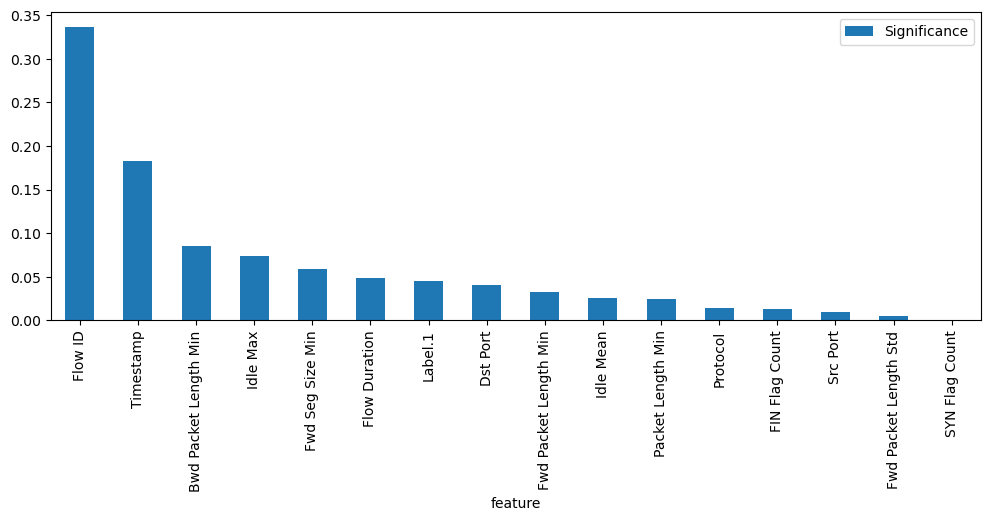

In [17]:
#Verifying whether the features selected above match those created by the RF Classifier 

#Use RFC for selecting features

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(train_x,train_y);

# extract Significance features
score = np.round(rfc.feature_importances_,20)
features = pd.DataFrame({'feature':train_x.columns,'Significance':score})
features = features.sort_values('Significance',ascending=False).set_index('feature')

# plot features
plt.rcParams['figure.figsize'] = (12, 4)
features.plot.bar();

##Train a  Model
* Which ML model would we choose and why?
* Trainig and evaluation of the model using the train data
* Is the data blanced? What are the implications, how can we deal with this?
* Discussing the results -> possible improvements?


In [18]:
#Split the data into trains and test them.

from sklearn.model_selection import train_test_split
from sklearn import metrics

data_train, data_test, labels_train, labels_test = train_test_split(train_x, train_y, test_size=0.3, random_state=111)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

lrc = LogisticRegression(solver='liblinear', penalty='l1')
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
rfc = RandomForestClassifier(n_estimators=31, random_state=111)

clfs = {'SVC' : svc,'KN' : knc, 'LR': lrc, 'RF': rfc}

def train_classifier(clf, data_train, labels_train):    
    clf.fit(data_train, labels_train)
    
def predict_labels(clf, features):
    return (clf.predict(features))

pred_scores = []
for k, v in clfs.items():
    train_classifier(v, data_train, labels_train)
    pred = predict_labels(v, data_test)
    pred_scores.append((k, [accuracy_score(labels_test, pred)]))

table = pd.DataFrame.from_dict(dict(pred_scores), orient='index', columns=['Score'])
print(table)

     Score
SVC   0.66
KN    0.97
LR    0.90
RF    1.00


In [23]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
LGR = LogisticRegression(n_jobs=-1, random_state=0)
LGR.fit(data_train, labels_train)
LGR_predictions = LGR.predict(data_test)

In [24]:
#RFC

from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=31, random_state=111).fit(data_train, labels_train)
RFC_predictions = RFC.predict(data_test)

In [25]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=200).fit(data_train, labels_train)
knn_predictions = knn.predict(data_test)


## Task 4: Evaluate 
* report the F1-Score on the test data - Who will build the bes model?

In [26]:
#Model Evaluation

####Logistic Regression

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# model accuracy for data_test   
accuracy_LGR = LGR.score(data_test, labels_test) 
print ("LGR-Model-Precision:" "\n", accuracy_LGR)

    
# creating a classification matrix 
cm_LGR = metrics.classification_report(labels_test, LGR_predictions)
print("LGR Research on classification:" "\n", cm_LGR) 


#### RFC

accuracy_RFC = RFC.score(data_test, labels_test) 
print ("RFC_Model_Precision:" "\n", accuracy_RFC)
    
# creating a classification matrix 
cm_RFC = metrics.classification_report(labels_test, RFC_predictions)
print("RFC_Research on classificationt:" "\n", cm_RFC) 

    
#### KNN

accuracy_KNN = knn.score(data_test, labels_test) 
print ("KNN_Model_Precision:" "\n", accuracy_KNN)
    
# creating a classification matrix 
cm_KNN = metrics.classification_report(labels_test, knn_predictions)
print("KNN_Research on classification:" "\n", cm_KNN) 

LGR-Model-Precision:
 0.659742339668857
LGR Research on classification:
               precision    recall  f1-score   support

           0       0.66      1.00      0.79     28012
           1       0.00      0.00      0.00      7168
           2       0.00      0.00      0.00       428
           3       0.00      0.00      0.00      6851

    accuracy                           0.66     42459
   macro avg       0.16      0.25      0.20     42459
weighted avg       0.44      0.66      0.52     42459

RFC_Model_Precision:
 0.9995996137450246
RFC_Research on classificationt:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28012
           1       1.00      1.00      1.00      7168
           2       1.00      0.98      0.99       428
           3       1.00      1.00      1.00      6851

    accuracy                           1.00     42459
   macro avg       1.00      1.00      1.00     42459
weighted avg       1.00      1.00    

# LazyClassifier

In [19]:
!pip install lazypredict

  Using cached lazypredict-0.2.12-py2.py3-none-any.whl (12 kB)
     --------------------------------------- 89.1/89.1 MB 68.6 kB/s eta 0:00:00
  Using cached lightgbm-3.3.5-py3-none-win_amd64.whl (1.0 MB)


In [20]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from IPython.core.display import display, HTML
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio


import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib
import warnings
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [21]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(data_train, data_test, labels_train, labels_test)

print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [07:40<00:00, 15.89s/it]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
DecisionTreeClassifier             1.00               1.00    None      1.00   
LGBMClassifier                     1.00               1.00    None      1.00   
BaggingClassifier                  1.00               1.00    None      1.00   
ExtraTreesClassifier               1.00               1.00    None      1.00   
XGBClassifier                      1.00               1.00    None      1.00   
RandomForestClassifier             1.00               1.00    None      1.00   
ExtraTreeClassifier                1.00               0.99    None      1.00   
KNeighborsClassifier               0.99               0.97    None      0.99   
SVC                                0.99               0.95    None      0.99   
QuadraticDiscriminantAnalysis      0.91               0.82    None      0.91   
AdaBoostClassifier                 0.56 